In [10]:
!pip install pydap
!pip install netcdf4

!apt-get -qq install libproj-dev proj-data proj-bin libgeos-dev
!pip install Cython
!pip install --upgrade --force-reinstall shapely --no-binary shapely
!pip install cartopy

%pylab inline
import pandas as pd
import xarray as xr

Selecting previously unselected package libgeos-dev.
(Reading database ... 134443 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb ...
Unpacking libgeos-dev (3.6.2-1build2) ...
Selecting previously unselected package libproj-dev:amd64.
Preparing to unpack .../libproj-dev_4.9.3-2_amd64.deb ...
Unpacking libproj-dev:amd64 (4.9.3-2) ...
Selecting previously unselected package proj-bin.
Preparing to unpack .../proj-bin_4.9.3-2_amd64.deb ...
Unpacking proj-bin (4.9.3-2) ...
Setting up libproj-dev:amd64 (4.9.3-2) ...
Setting up libgeos-dev (3.6.2-1build2) ...
Setting up proj-bin (4.9.3-2) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
     |████████████████████████████████| 358kB 2.8MB/s 
Skipping wheel build for shapely, due to binaries being disabled for it.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Shapely 1.7.0
    U

# **Extreme Precipitation Days (1996-2019)**

In [0]:
years = pd.date_range(start='1996-01-01', end='2019-12-31', freq='D')
yearmon = years[(years.month==10) | (years.month==11) | (years.month==12)]



In [5]:
windv_250_ds = []
windu_250_ds = []
hgt_500_ds = []

years = [i for i in range(1996,2020)]


for iyr in years:
    dates_year = yearmon[yearmon.year==iyr]
    print('working on '+str(iyr))
    #find 3 random dates in 1996 during June - August - here you would put your extreme precip dates for this year
    #dates = random_dates2(pd.datetime(iyr,6,1), pd.datetime(iyr,8,31), 3)
    #let's access geopotential height at 500 hPa
    windu_250 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/uwnd.'+str(iyr)+'.nc',
                         engine='netcdf4').sel(level=250,time=dates_year)
    windu_250_ds.append(windu_250)

    windv_250 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/vwnd.'+str(iyr)+'.nc',
                         engine='netcdf4').sel(level=250,time=dates_year)
    windv_250_ds.append(windv_250)

    hgt_500 = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.dailyavgs/pressure/hgt.'+str(iyr)+'.nc',
                         engine='netcdf4').sel(level=500,time=dates_year)
    hgt_500_ds.append(hgt_500)



working on 1996
working on 1997
working on 1998
working on 1999
working on 2000
working on 2001
working on 2002
working on 2003
working on 2004
working on 2005
working on 2006
working on 2007
working on 2008
working on 2009
working on 2010
working on 2011
working on 2012
working on 2013
working on 2014
working on 2015
working on 2016
working on 2017
working on 2018
working on 2019


In [6]:
windu_250_ds_yearcombined = xr.concat(windu_250_ds, dim='time')
windu_250_ds_yearcombined

windv_250_ds_yearcombined = xr.concat(windv_250_ds, dim='time')
windv_250_ds_yearcombined

# hgt_500_ds_yearcombined = xr.concat(hgt_500_ds, dim='time')
# hgt_500_ds_yearcombined

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 2208)
Coordinates:
    level    float32 250.0
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1996-10-01 1996-10-02 ... 2019-12-31
Data variables:
    vwnd     (time, lat, lon) float32 -7.639984 -7.7499847 ... 7.2750006
Attributes:
    References:                      http://www.esrl.noaa.gov/psd/data/gridde...
    dataset_title:                   NCEP-NCAR Reanalysis 1
    Conventions:                     COARDS
    title:                           mean daily NMC reanalysis (1996)
    description:                     Data is from NMC initialized reanalysis\...
    platform:                        Model
    history:                         created 95/02/06 by Hoop (netCDF2.3)\nCo...
    DODS_EXTRA.Unlimited_Dimension:  time

# **Baseline for Comparison (1981-2010)**

In [7]:
# 250 hPa wind vectors and wind speed 

windu_250_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=250)

windv_250_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=250)

windspd_250_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/wspd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=250)

# 500 hPa wind vectors and geopotential height 

windu_500_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=500)

windv_500_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=500)

hgt_500_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/hgt.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=500)

# 850 hPa temperature, specific humidity, and wind vectors 

temp_850_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/air.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=850)

spec_hum_850_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/shum.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=850)

windu_850_ltm_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/uwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=850)

windv_850_ltm_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/pressure/vwnd.mon.1981-2010.ltm.nc', engine='netcdf4').sel(level=850)

# skin temperature 

skin_temp_ltm_baseline = xr.open_dataset('https://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface_gauss/skt.sfc.mon.1981-2010.ltm.nc', engine='netcdf4')

# surface winds (sig995??)

surf_wind_u_baseline = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/uwnd.sig995.mon.1981-2010.ltm.nc', engine='netcdf4')

surf_wind_u_baseline = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/vwnd.sig995.mon.1981-2010.ltm.nc', engine='netcdf4')

# total atmospheric column water vapor 

atm_col_wv_baseline = xr.open_dataset('http://www.esrl.noaa.gov/psd/thredds/dodsC/Datasets/ncep.reanalysis.derived/surface/pr_wtr.eatm.day.1981-2010.ltm.nc', engine='netcdf4')

/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time ax

In [27]:
windu_250_ltm_OND = windu_250_baseline.isel(time=slice(9,12))

windu_250_ltm_OND = windu_250_ltm_OND.mean(dim='time')
print(windu_250_ltm_OND)

<xarray.Dataset>
Dimensions:         (lat: 73, lon: 144)
Coordinates:
    level           float32 250.0
  * lon             (lon) float32 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lat             (lat) float32 90.0 87.5 85.0 82.5 ... -85.0 -87.5 -90.0
Data variables:
    uwnd            (lat, lon) float32 -0.73889047 -0.7063348 ... 0.953665
    valid_yr_count  (lat, lon) float32 2.755107e-39 2.755107e-39 ... 0.0 0.0


# **Calculating Seasonal Anomalies**


# **Maps**


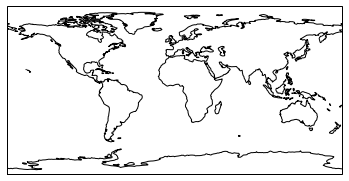

In [12]:
import cartopy.crs as ccrs 
import matplotlib.pyplot as plt 
import cartopy.feature as cfeature

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('110m'))

plt.show()

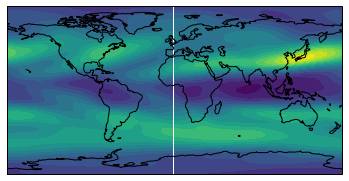

In [28]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE.with_scale('110m'))
plt.contourf(windu_250_ltm_OND['lon'], windu_250_ltm_OND['lat'], windu_250_ltm_OND['uwnd'].values.squeeze(), 20, transform=ccrs.PlateCarree())